[[28 59 20 ...  0  0 20]
 [48 61 10 ...  1  0 21]
 [24 53  3 ...  0  0 16]
 ...
 [27 51 13 ...  0  0 15]
 [38 48 15 ...  1  1 13]
 [38 96 17 ...  1  0 30]]
     dewptc  hum  wndspd  pressure  rain  smoke  temp
0        28   59      20      1008     0      0    20
1        48   61      10      1012     1      0    21
2        24   53       3      1001     0      0    16
3        17   54       8      1002     0      0    16
4        27   51       5      1007     0      0    14
..      ...  ...     ...       ...   ...    ...   ...
995      46   51      14       998     0      1    15
996      40   54      12      1012     0      1    16
997      27   51      13      1021     0      0    15
998      38   48      15      1006     1      1    13
999      38   96      17      1005     1      0    30

[1000 rows x 7 columns]


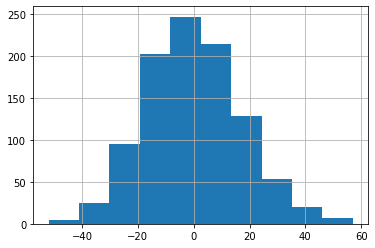

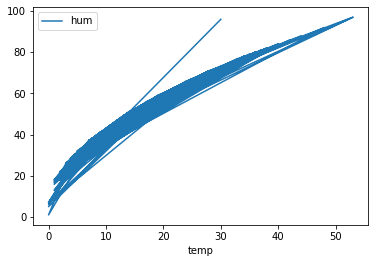

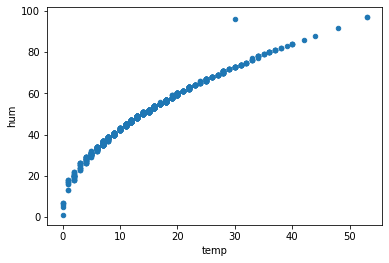

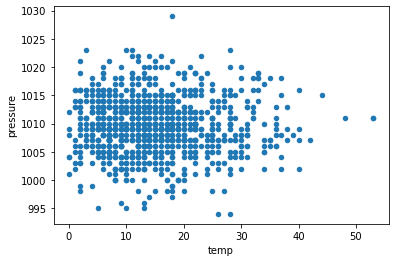

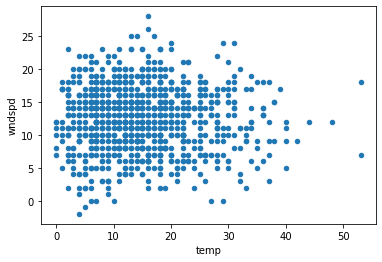

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt
import random
from statistics import mean 

df = pd.read_csv('weather_data.csv')

#Rearranging columns in the input

cols = df.columns.tolist()

numpy_df = df.to_numpy()

print(numpy_df)

print(df)
df['dewptc'].diff().hist()
df.plot(x='temp',y='hum')
df.plot.scatter(x='temp',y='hum')
df.plot.scatter(x='temp',y='pressure')
df.plot.scatter(x='temp',y='wndspd')

In [2]:
#Linear Regression

#randomize indices, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

In [3]:
train_df.head()

,index,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,952,38,60,14,1005,1,1,20
1,418,33,59,7,1015,0,0,20
2,161,32,42,19,1005,0,0,10
3,837,58,39,10,1009,0,0,8
4,995,46,51,14,998,0,1,15


In [4]:
test_df.head()

,index,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,264,36,48,15,1010,0,0,13
1,653,19,44,14,1013,0,0,11
2,814,21,26,12,1007,0,0,3
3,644,39,70,16,1011,1,1,28
4,398,39,67,16,1011,1,0,25


In [5]:
x_train = train_df.iloc[:,1:7]
y_train = train_df.iloc[:,7]

x_test = test_df.iloc[:,1:7]
y_test = test_df.iloc[:,7]

#augmenting data to include constant term
x_train['ones'] = 1
x_test['ones'] = 1

# x_train['dewptc'] = (x_train['dewptc']-x_train['dewptc'].mean())/(x_train['dewptc'].std())
# x_train['hum'] = (x_train['hum']-x_train['hum'].mean())/(x_train['hum'].std())
# x_train['wndspd'] = (x_train['wndspd']-x_train['wndspd'].mean())/(x_train['wndspd'].std())
# x_train['pressure'] = (x_train['pressure']-x_train['pressure'].mean())/(x_train['pressure'].std())
# normalizing columns
for col in ['dewptc', 'hum', 'wndspd', 'pressure']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())

print(x_train.head())
print(y_train.head())

     dewptc       hum    wndspd  pressure  rain  smoke  ones
0  0.742336  0.670916  0.276578 -0.894905     1      1     1
1  0.333110  0.605941 -1.146985  1.079979     0      0     1
2  0.251265 -0.498639  1.293409 -0.894905     0      0     1
3  2.379240 -0.693565 -0.536887 -0.104951     0      0     1
4  1.397098  0.086139  0.276578 -2.277323     0      1     1
0    20
1    20
2    10
3     8
4    15
Name: temp, dtype: int64


In [6]:
X_test = x_test.to_numpy()
X_train = x_train.to_numpy()
Y_test = y_test.to_numpy()
Y_test = Y_test.reshape((Y_test.shape[0],1))
Y_train = y_train.to_numpy()
Y_train = Y_train.reshape((Y_train.shape[0],1))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(700, 7)
(300, 7)
(700, 1)
(300, 1)


In [7]:
num_iter = 200
rate = 0.1
W = np.random.rand(X_train.shape[1],1)

[[ 5.10604160e-02]
 [ 7.94917670e+00]
 [-1.54529713e-01]
 [-6.24149920e-03]
 [ 2.04972579e+00]
 [ 9.25989710e-02]
 [ 1.43801475e+01]]
2.8162643719249796
3.1093283203047504


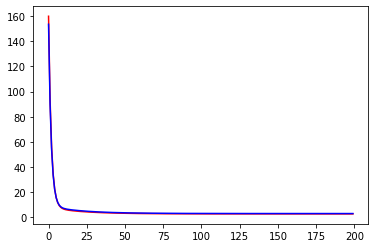

In [8]:
def loss(W,X,Y):
    # W = np.random.rand(7,1)
    square_loss = np.mean((np.matmul(X,W) - Y)**2)
    return square_loss

def gradient(W,X,Y):
    grad = -2*np.matmul(X.T,(np.matmul(X,W) - Y))/X.shape[0]
    return grad

def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss = [], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss

W0 = np.random.rand(X_train.shape[1],1)

W0, train_loss, test_loss = sgd(W0,X_train,Y_train,X_test,Y_test,rate,num_iter)

print(W0)
print(train_loss[-1])
print(test_loss[-1])

plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

[[-0.48592428]
 [ 7.78437303]
 [-0.67267794]
 [-0.47306999]
 [ 0.56121365]
 [-2.06275721]
 [14.90808956]]
32.13064797444317
32.008464690916796


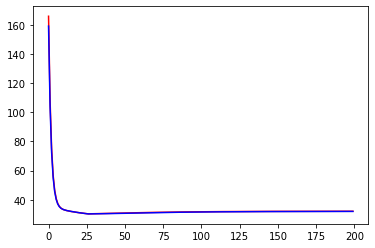

In [9]:
def lossL1(W,X,Y,lam):
    square_loss = np.mean((np.matmul(X,W) - Y)**2) + lam*np.sum(np.abs(W))
    return square_loss

def gradientL1(W,X,Y,lam):
    W_grad = np.zeros(W.shape)
    for i in range(W_grad.shape[0]):
        if(W[i] > 0):
            W_grad = 1
        else:
            W_grad = -1
    grad = -2*np.matmul(X.T,(np.matmul(X,W)-Y))/X.shape[0] - lam*W_grad
    #print(grad)
    return grad

def sgdL1(W,X,Y,X_test,Y_test,rate,num_iter,lam):
    train_loss, test_loss = [], []
    for _ in range(0, num_iter):
        grad = gradientL1(W,X,Y,lam)
 
        W = W + rate*grad
        train_loss.append(lossL1(W,X,Y,lam))
        test_loss.append(lossL1(W,X_test,Y_test,lam))
    return W, train_loss, test_loss

lam1 = 1

W1 = np.random.rand(X_train.shape[1],1)

W1, train_lossL1, test_lossL1 = sgdL1(W1,X_train,Y_train,X_test,Y_test,rate,num_iter,lam1)

print(W1)
print(train_lossL1[-1])
print(test_lossL1[-1])

plt.plot(train_lossL1, 'r')
plt.plot(test_lossL1, 'b')
plt.show()

[[ 0.0591317 ]
 [ 6.83328177]
 [-0.13142442]
 [-0.03180235]
 [ 3.69435143]
 [ 1.07851724]
 [12.36501574]]
26.821530059701974
26.68829616112454


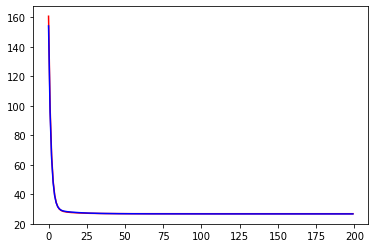

In [10]:
def lossL2(W,X,Y,lam):
    square_loss = np.mean((np.matmul(X,W) - Y)**2) + lam*np.sum(np.multiply(W,W))
    return square_loss

def gradientL2(W,X,Y,lam):
    grad = -2*np.matmul(X.T,(np.matmul(X,W) - Y))/X.shape[0] - 2*lam*W
    return grad

def sgdL2(W,X,Y,X_test,Y_test,rate,num_iter,lam):
    train_loss, test_loss = [], []
    for _ in range(0, num_iter):
        grad = gradientL2(W,X,Y,lam)
    
        W = W + rate*grad
        train_loss.append(lossL2(W,X,Y,lam))
        test_loss.append(lossL2(W,X_test,Y_test,lam))
    return W, train_loss, test_loss

lam2 = 0.1

W2 = np.random.rand(X_train.shape[1],1)

W2, train_lossL2, test_lossL2 = sgdL2(W2,X_train,Y_train,X_test,Y_test,rate,num_iter,lam2)

print(W2)
print(train_lossL2[-1])
print(test_lossL2[-1])


plt.plot(train_lossL2, 'r')
plt.plot(test_lossL2, 'b')
plt.show()

[[ 1.44716585e-02]
 [ 4.70540756e+00]
 [-9.23881166e-02]
 [-5.24066741e-03]
 [ 3.69880256e+00]
 [ 1.52018775e+00]
 [ 8.42989036e+00]]
148.20364750289832
146.42277734507238


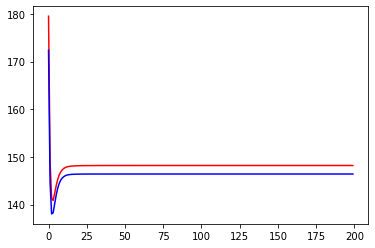

In [11]:
def lossE(W,X,Y,lam1, lam2):
    square_loss = np.mean((np.matmul(X,W) - Y)**2) + lam1*np.sum(np.multiply(W,W)) + lam2*np.sum(np.abs(W))
    return square_loss

def gradientE(W,X,Y,lam1, lam2):
    W_grad = np.zeros(W.shape)
    for i in range(W_grad.shape[0]):
        if(W[i] > 0):
            W_grad = 1
        else:
            W_grad = -1
    grad = -2*np.matmul(X.T,(np.matmul(X,W) - Y))/X.shape[0] - 2*lam2*W - lam1*W
    return grad

def sgdE(W,X,Y,X_test,Y_test,rate,num_iter,lam1,lam2):
    train_loss, test_loss = [], []
    for _ in range(0, num_iter):
        grad = gradientE(W,X,Y,lam1,lam2)
    
        W = W + rate*grad
        train_loss.append(lossE(W,X,Y,lam1,lam2))
        test_loss.append(lossE(W,X_test,Y_test,lam1,lam2))
    return W, train_loss, test_loss

WE = np.random.rand(X_train.shape[1],1)

lam3 = 1
lam4 = 0.1

WE, train_loss_E, test_loss_E = sgdE(WE,X_train,Y_train,X_test,Y_test,rate,num_iter,lam3,lam4)

print(WE)
print(train_loss_E[-1])
print(test_loss_E[-1])

plt.plot(train_loss_E, 'r')
plt.plot(test_loss_E, 'b')
plt.show()

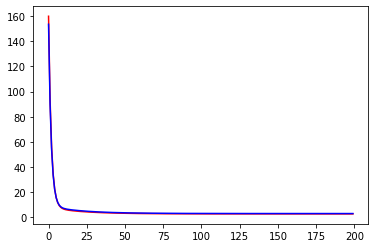

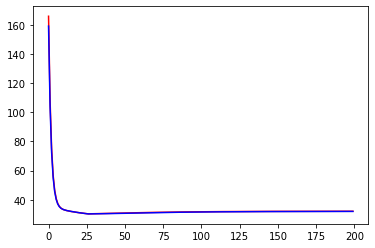

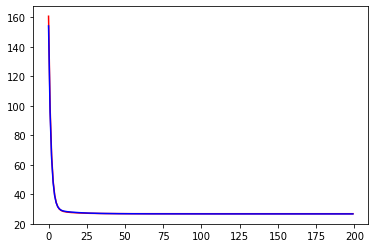

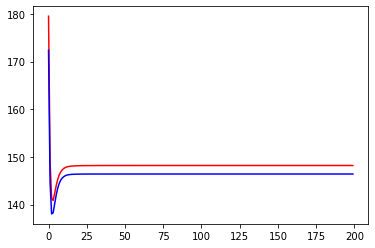

In [12]:
plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

plt.plot(train_lossL1, 'r')
plt.plot(test_lossL1, 'b')
plt.show()

plt.plot(train_lossL2, 'r')
plt.plot(test_lossL2, 'b')
plt.show()

plt.plot(train_loss_E, 'r')
plt.plot(test_loss_E, 'b')
plt.show()

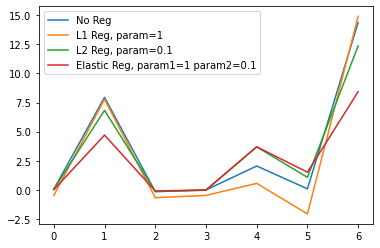

In [13]:
plt.plot(W0, label='No Reg')
plt.plot(W1, label='L1 Reg, param=' + str(lam1))
plt.plot(W2, label='L2 Reg, param=' + str(lam2))
plt.plot(WE, label='Elastic Reg, ' + 'param1=' + str(lam3) + ' param2=' + str(lam4))
plt.legend()
plt.show()

In [14]:

# Add more arguments to iterate over arrays of parameters

def cross_validate(data,k,rate,num_iter,lam1,lam2): 
    #shuffle the data (actual order is also changed)
    
    np.random.shuffle(data)
    
    #normalise
    
    for i in range(4):
        data_col = data[:,i]
        data_mean = data_col.mean()
        data_std = data_col.std()
        data[:,i] = (data[:,i] - data_mean)/data_std
        
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    
    Kfoldsplit = np.array_split(data,k)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    
    test_score = []
    train_score = []
    
    
    
    for i in range(k):
        test = Kfoldsplit[i]
        train = []
        
        for j in range(k):
            if(j != i):
                train.append(Kfoldsplit[j])
        
        # Start of preparing test and train numpy arrays
        # Assert: The last column is the column of predictions
        # Assert: Data is not augmented
        
        Train = np.concatenate(train,axis=0)
        X_train = Train[:,0:-1]
        train_ones = np.ones((X_train.shape[0],1))
        X_train = np.append(X_train,train_ones,axis=1)
        
        Y_train = Train[:,-1]
        Y_train = Y_train.reshape((Y_train.shape[0],1))
        
        X_test = test[:,0:-1]
        test_ones = np.ones((X_test.shape[0],1))
        X_test = np.append(X_test,test_ones,axis=1)
        Y_test = test[:,-1]
        Y_test = Y_test.reshape((Y_test.shape[0],1))
        
        # End of preparing dataset
        
        # Replace the following with appropriate algorithm
        
        W = np.random.rand(X_train.shape[1],1)

        W, test_loss, train_loss = sgdE(W,X_train,Y_train,X_test,Y_test,rate,num_iter,lam1,lam2)
        
        test_score.append(test_loss[-1])
        train_score.append(train_loss[-1])
        
    return train_score, test_score

[]

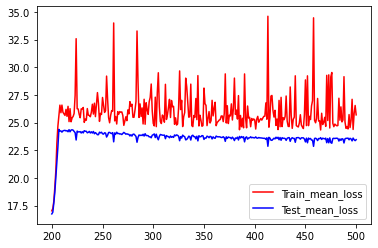

In [15]:
test_scores = []
train_scores = []

intervals = 21


lam1 = np.linspace(20,0,intervals)
lam2 = np.linspace(0,0,intervals)

iterations = np.linspace(200,500,301)

for i in range(301):
    train_s, test_s = cross_validate(numpy_df,5,0.01,int(iterations[i]),0,0)
    train_scores.append(mean(train_s))
    test_scores.append(mean(test_s))
    
plt.plot(iterations, train_scores,'r',label='Train_mean_loss')
plt.plot(iterations, test_scores, 'b',label='Test_mean_loss')
plt.legend()
plt.plot()